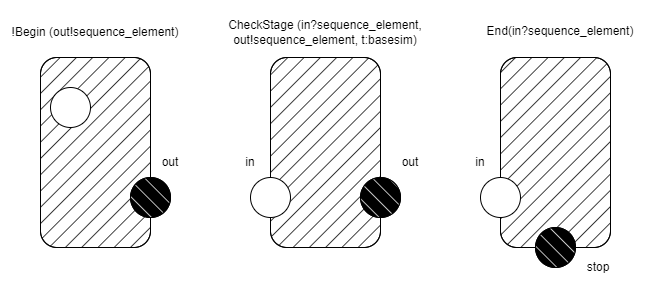

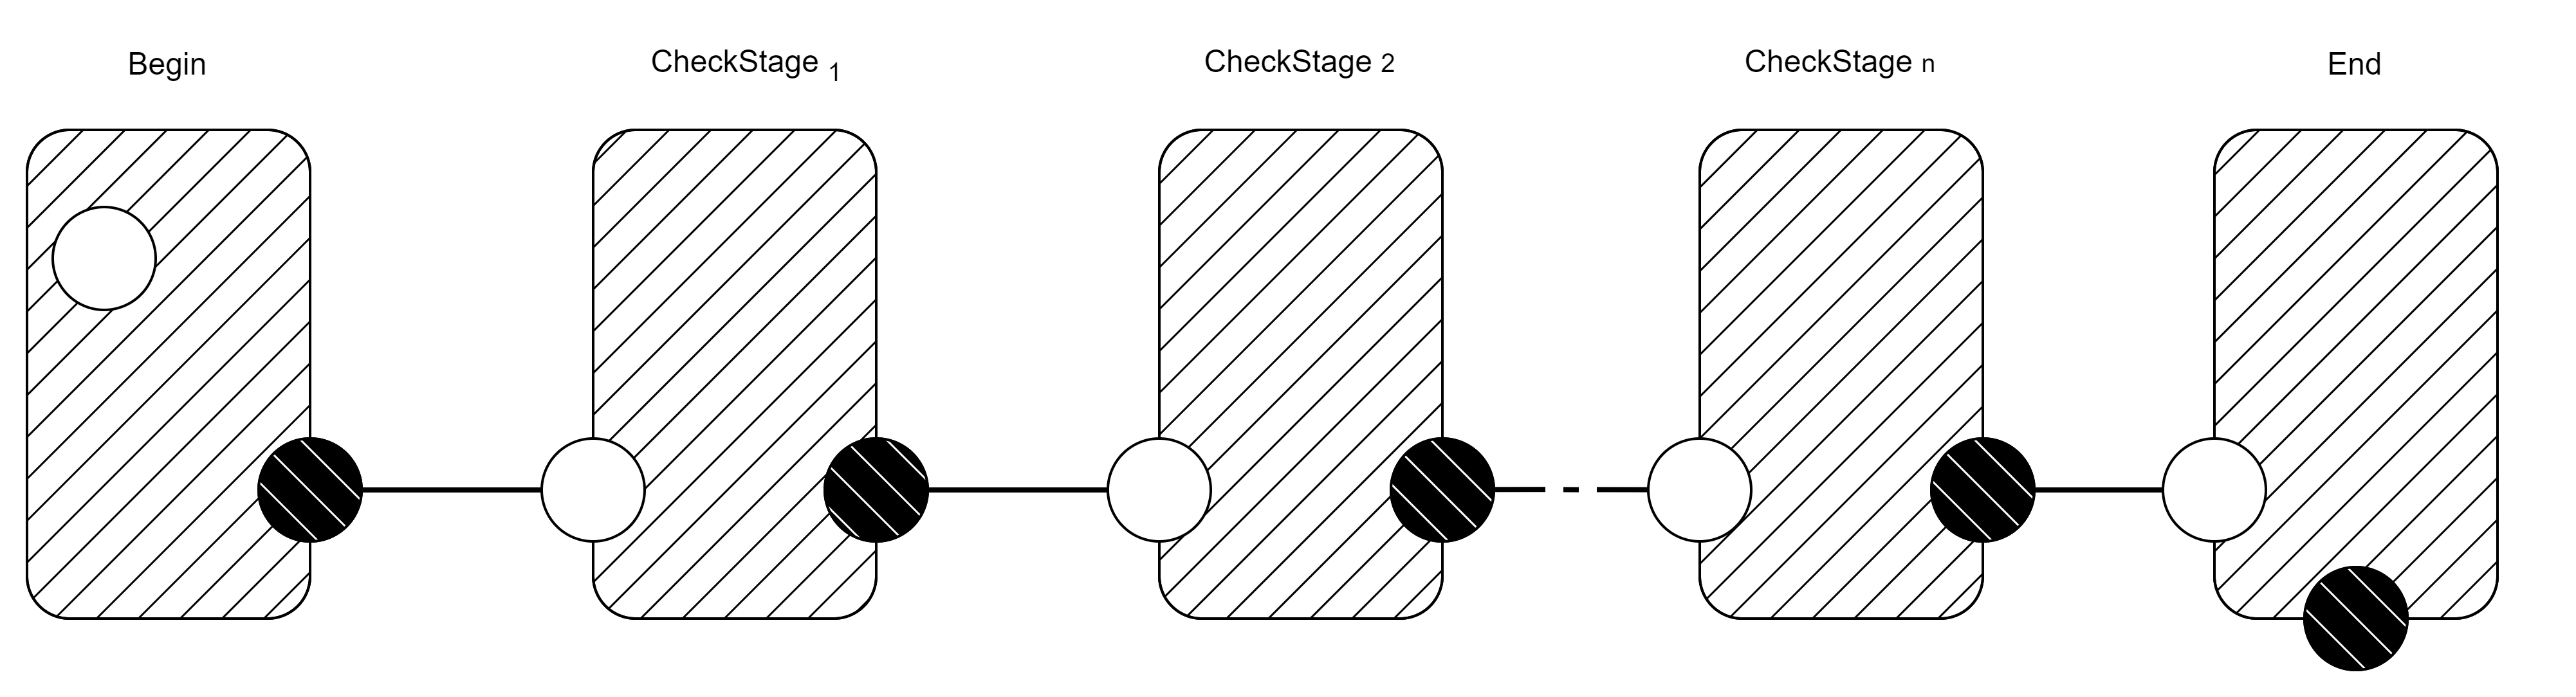

Спросить:
- правильно ли поняли, что основное отличие между сообщениями типа "!" и "?" заключается в привязке к конкретному актору?
  Т.е. !-сообщение привязывается к актору, и можно проверить доступ через access, ? - нужно привязывать вручную через bind + для него сразу генерируется обработчик.
- Про метод out в рамках цепочки: on_out вызывается в момент, когда следующий актор вызывает _in.send() ? 

In [1]:
!../../bin/acta lab.hpp

line:35
!Begin(out!sequence_element)
line:91
CheckStage(in?sequence_element,out!sequence_element,t:basesim)
line:191
End(in?sequence_element)
Ok

run the sample

In [2]:
#pragma cling add_include_path("../../lib/")

const int N = 5; // число звеньев в цепочке проверяющих акторов (не считая конечное звено - актор end)
// => всего найденных чисел будет N+1

#include "lab.hpp"

engine eng;
basesim_engine teng;
    
Begin beginStage(eng);
CheckStage stages[N];
End   endStage(eng);
    
beginStage.max_elements_num = 30;
    
sequence_element* last_check_stage = &beginStage.out; // в начальный актор передаем ссылку на собщение первого проверяющего актора в цепочке
endStage.in(stages[N-1].out); // в финальный актор передаем ссылку на собщение последнего проверяющего в цепочке
        
// каждому актору в цепочке присваиваем ссылку на сообщение следующего и вспомогательный идентификатор (для отладки)
for(int i=0; i<N; i++){
    stages[i].engines(eng, teng);  
    
    stages[i].stage_id = i; 
    stages[i].in(*last_check_stage); 
    last_check_stage = &stages[i].out;
}

eng.start();
teng.run();
    
cout << (eng.stopped() ? "Успешное выполнение" : "Возникла ошибка");

if (eng.stopped())
{
    std::cout << "\nMaximum number of tasks executed in parallel : " << teng.Pmax() << std::endl;
    std::cout << "Time of sequential execution of all tasks    : " << teng.T1() << std::endl;
    std::cout << "Time of parallel   execution of all tasks    : " << teng.Tp() << std::endl;
}

--- Отправка элемента последовательности 2 из начального актора Begin
--- CheckStage 0
------ Проверка элемента последовательности 2 в акторе со stage_id = 0
------ Сохранение элемента 2 в акторе со stage_id = 0
---------------------------------
|   НАЙДЕНО ПРОСТОЕ ЧИСЛО: 2   |
---------------------------------
--- Отправка элемента последовательности 3 из начального актора Begin
--- CheckStage 0
------ Проверка элемента последовательности 3 в акторе со stage_id = 0
------ 3 не кратно числу 2
--- Отправка элемента последовательности 4 из начального актора Begin
--- CheckStage 1
------ Проверка элемента последовательности 3 в акторе со stage_id = 1
------ Сохранение элемента 3 в акторе со stage_id = 1
---------------------------------
|   НАЙДЕНО ПРОСТОЕ ЧИСЛО: 3   |
---------------------------------
--- CheckStage 0
------ Проверка элемента последовательности 4 в акторе со stage_id = 0
------ 4 кратно числу 2
--- Отправка элемента последовательности 5 из начального актора Begin
--- Che

In [3]:
!g++ lab.cpp -I ../../lib -o lab

In [4]:
!./lab

--- Отправка элемента последовательности 2 из начального актора Begin
--- CheckStage 0
------ Проверка элемента последовательности 2 в акторе со stage_id = 0
------ Сохранение элемента 2 в акторе со stage_id = 0
---------------------------------
|   НАЙДЕНО ПРОСТОЕ ЧИСЛО: 2   |
---------------------------------
--- Отправка элемента последовательности 3 из начального актора Begin
--- CheckStage 0
------ Проверка элемента последовательности 3 в акторе со stage_id = 0
------ 3 не кратно числу 2
--- Отправка элемента последовательности 4 из начального актора Begin
--- CheckStage 1
------ Проверка элемента последовательности 3 в акторе со stage_id = 1
------ Сохранение элемента 3 в акторе со stage_id = 1
---------------------------------
|   НАЙДЕНО ПРОСТОЕ ЧИСЛО: 3   |
---------------------------------
--- CheckStage 0
------ Проверка элемента последовательности 4 в акторе со stage_id = 0
------ 4 кратно числу 2
--- Отправка элемента последовательности 5 из начального актора Begin
--- Che

ERROR: received unknown message
Message type: usage_request
ERROR: received unknown message
Message type: usage_request
